In [1]:
import numpy as np
import time
from ds1054z import DS1054Z
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import blackmanharris
from matplotlib.ticker import EngFormatter
from scipy import signal
from IPython.display import Markdown, display

scope = DS1054Z('192.168.1.252')
print(scope.idn)

def printmd(string, color=None):
    if color != None:
        string = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(string))

RIGOL TECHNOLOGIES,DS1054Z,DS1ZA192409533,00.04.04.SP3


In [2]:
def check_monotonicity_rise(time_data, voltage_data, threshold, window_len=301):
    voltage_data_filtered = signal.savgol_filter(voltage_data, window_length=window_len, polyorder=2, delta=(time_data[1]-time_data[0]))
    fig, ax = plt.subplots()
    ax.plot(time_data, voltage_data) 
    ax.plot(time_data, voltage_data_filtered) 
    formatter = EngFormatter(unit='s')
    ax.xaxis.set_major_formatter(formatter)
    plt.xlabel('Time')
    plt.ylabel('Volts')
    
    dvdt = signal.savgol_filter(voltage_data, window_length=window_len, polyorder=2, deriv=1, delta=(time_data[1]-time_data[0]))*1e-3

    fig, ax = plt.subplots(2,figsize=(10,8), dpi=100)
    nmon = dvdt < threshold
    errors_x = []
    errors_y = []
    for x in range(0,len(nmon)):
        if nmon[x]:
            errors_x.append(time_data[x])
            errors_y.append(voltage_data_filtered[x])

    ax[0].plot(errors_x,errors_y,'.', color='lightcoral', markersize=20) 
    ax[0].plot(time_data,voltage_data_filtered)
    ax[0].set(ylabel='Volts')
    ax[1].axhline(threshold, color='lightcoral')
    ax[1].plot(time_data,dvdt) 
    ax[1].set(ylabel='Volts/ms')
    formatter = EngFormatter(unit='s')
    ax[0].xaxis.set_major_formatter(formatter)
    ax[1].xaxis.set_major_formatter(formatter)
    plt.xlabel('Time')
    
    return min(dvdt)

### 2.11.4.5

**Checking 2.11.4.5 - +5V rail rise shall be monotonic**

Setting up scope for checking rising monotonicity...
Scope setup. Waiting for trigger.
Triggered!
Grabbing scope data...
Grabbed scope data!
Maximum Negative slew is -0.35 V/ms


<span style='color:Green'>2.11.4.5 - PASSED</span>

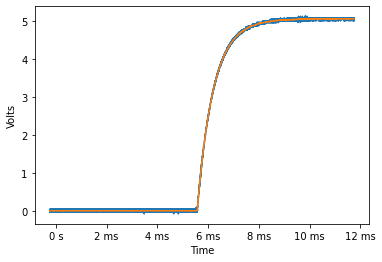

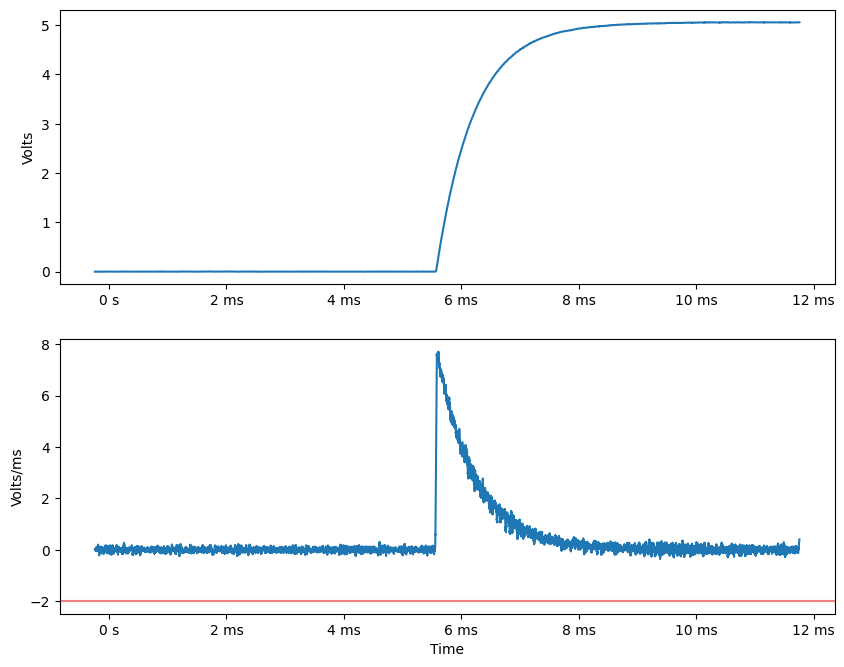

In [3]:
reqnum = '2.11.4.5'
printmd("### {}".format(reqnum))
printmd("**Checking {} - +5V rail rise shall be monotonic**".format(reqnum))
print("Setting up scope for checking rising monotonicity...")
scope.run()
scope.display_only_channel(1)
scope.set_probe_ratio(1,1)
scope.memory_depth = 120e3
scope.timebase_scale = 1e-3
scope.timebase_offset = 0
scope.set_channel_scale(1,1)
scope.set_channel_offset(1,-3)
scope.write(':TRIGger:MODE EDGE')
scope.write(':TRIGger:COUPling DC')
scope.write(':TRIGger:EDGe:SOURce CHANnel1')
scope.write(':TRIGger:EDGe:SLOPe POSitive')
scope.write(':TRIGger:EDGe:LEVel 2.5')
scope.single()
time.sleep(1)
print("Scope setup. Waiting for trigger.")
while(scope.running):
    time.sleep(1)
print("Triggered!")

print("Grabbing scope data...")
V1 = scope.get_waveform_samples(1,mode='MAX')
Ts1 = scope.waveform_time_values
print("Grabbed scope data!")

monotonic_threshold = -2 # V/ms

minimum_slew = check_monotonicity_rise(Ts1, V1, threshold=monotonic_threshold)

print('Maximum Negative slew is {:.2f} V/ms'.format(minimum_slew))

if(minimum_slew > monotonic_threshold):
    printmd('{} - PASSED'.format(reqnum), color='Green')
else:
    printmd('{} - FAILED'.format(reqnum), color='Red')

plt.show()

In [4]:
reqnum = '2.11.4.4'
printmd("### {}".format(reqnum))
printmd("**Checking 2.11.4.4 - +5V rail rise time shall be no faster than 10 V/ms**")
rise_slew_rate = float(scope.query(':MEASure:ITEM? PSLEWrate,CHANnel1'))
print('+5V Rail rise slew rate is {:.1f} V/s'.format(rise_slew_rate))
if(minimum_slew < 10e3):
    printmd('{} - PASSED'.format(reqnum), color='Green')
else:
    printmd('{} - FAILED'.format(reqnum), color='Red')


### 2.11.4.4

**Checking 2.11.4.4 - +5V rail rise time shall be no faster than 10 V/ms**

+5V Rail rise slew rate is 3009.5 V/s


<span style='color:Green'>2.11.4.4 - PASSED</span>

### 2.11.3.5

**Checking 2.11.3.5- +12V rail rise shall be monotonic**

Setting up scope for checking rising monotonicity...
Scope setup. Waiting for trigger.
Triggered!
Grabbing scope data...
Grabbed scope data!
Maximum Negative slew is -5.55 V/ms


<span style='color:Red'>2.11.3.5 - FAILED</span>

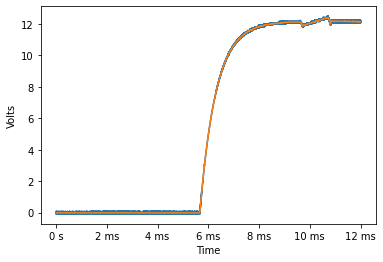

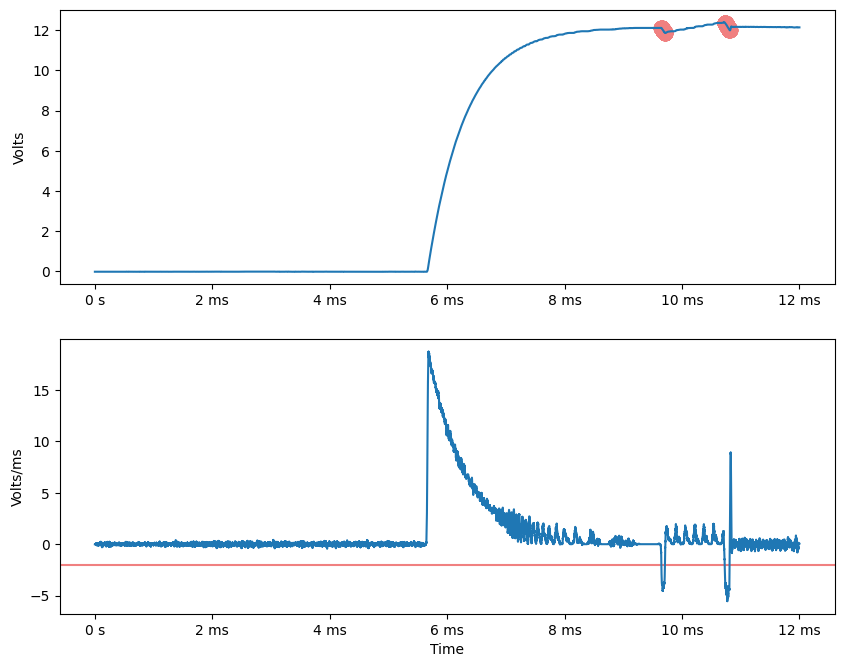

In [7]:
reqnum = '2.11.3.5'
printmd('### {}'.format(reqnum))
printmd("**Checking {}- +12V rail rise shall be monotonic**".format(reqnum))
print("Setting up scope for checking rising monotonicity...")
scope.run()
scope.display_only_channel(1)
scope.set_probe_ratio(1,1)
scope.memory_depth = 120e3
scope.timebase_scale = 1e-3
scope.timebase_offset = 0
scope.set_channel_scale(1,2)
scope.set_channel_offset(1,-6)
scope.write(':TRIGger:MODE EDGE')
scope.write(':TRIGger:COUPling DC')
scope.write(':TRIGger:EDGe:SOURce CHANnel1')
scope.write(':TRIGger:EDGe:SLOPe POSitive')
scope.write(':TRIGger:EDGe:LEVel 5')
scope.single()
time.sleep(1)
print("Scope setup. Waiting for trigger.")
while(scope.running):
    time.sleep(1)
print("Triggered!")

print("Grabbing scope data...")
V1 = scope.get_waveform_samples(1,mode='MAX')
Ts1 = scope.waveform_time_values
print("Grabbed scope data!")

monotonic_threshold = -2 # V/ms

minimum_slew = check_monotonicity_rise(Ts1, V1, threshold=monotonic_threshold)

print('Maximum Negative slew is {:.2f} V/ms'.format(minimum_slew))

if(minimum_slew > monotonic_threshold):
    printmd('{} - PASSED'.format(reqnum), color='Green')
else:
    printmd('{} - FAILED'.format(reqnum), color='Red')

plt.show()

In [6]:
reqnum = '2.11.3.4'
printmd('### {}'.format(reqnum))
printmd('**Checking {} - +12V rail rise time shall be no faster than 10 V/ms**'.format(reqnum))
rise_slew_rate = float(scope.query(':MEASure:ITEM? PSLEWrate,CHANnel1'))
print('+12V Rail rise slew rate is {:.1f} V/s'.format(rise_slew_rate))
if(minimum_slew < 10e3):
    printmd('{} - PASSED'.format(reqnum), color='Green')
else:
    printmd('{} - FAILED'.format(reqnum), color='Red')


### 2.11.3.4

**Checking 2.11.3.4 - +12V rail rise time shall be no faster than 10 V/ms**

+12V Rail rise slew rate is 7211.5 V/s


<span style='color:Green'>2.11.3.4 - PASSED</span>